In [1]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
#from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

import mlflow
import mlflow.tensorflow

import matplotlib.pyplot as plt


Text(0.5, 1.0, '9')

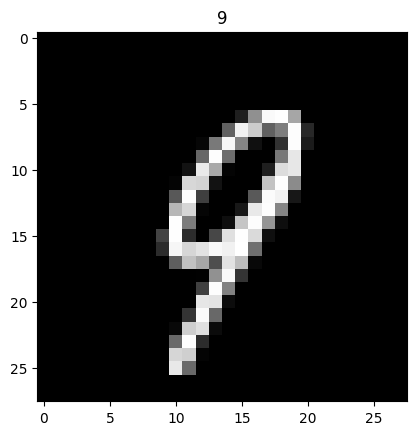

In [2]:
(X_train, y_train ), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[22], cmap='gray')
plt.title(y_train[22])


In [3]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [4]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalization
X_test /= 255


In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_test[0]

In [7]:
def treina_dl(n_camadas_ocultas, n_neuronios, activation, drop_out, epochs):
  mlflow.set_tracking_uri("http://localhost:5000")
  mlflow.set_experiment('dl_experimento')

  with mlflow.start_run():
    
    
    mlflow.tensorflow.autolog()

  # registro de tags
    mlflow.set_tag('n_camadas_ocultas', n_camadas_ocultas)
    mlflow.set_tag('n_neuronios', n_neuronios)
    mlflow.set_tag('activation', activation)
    mlflow.set_tag('drop_out', drop_out)
    mlflow.set_tag('epochs', epochs)
    

    model = Sequential()

    # cria camada oculta mais camada de entrada 
    model.add(Dense(units=n_neuronios, activation=activation, input_dim=784))
    model.add(Dropout(drop_out))

    # camadas ocultas adicionais 

    for i in range(n_camadas_ocultas):
      model.add(Dense(units=n_neuronios, activation=activation))
      model.add(Dropout(drop_out))

    # camada de saida

    model.add(Dense(units=10, activation='softmax'))

    # compilando o modelo

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_test, y_test))
    
    # Gráfico para erros

    history.history.keys()
    plt.plot(history.history['val_loss'])
    plt.savefig('loss.png')
    acuracia = plt.plot(history.history['val_accuracy'])
    plt.savefig('accuracy.png')

    # registrar os artefatos
    mlflow.log_artifact('loss.png')
    mlflow.log_artifact('accuracy.png')    
    
    

    # informações de execução

    print('Modelo:', mlflow.active_run().info.run_uuid)

  mlflow.end_run()


2023/09/29 08:58:45 INFO mlflow.tracking.fluent: Experiment with name 'dl_experimento' does not exist. Creating a new experiment.
2023/09/29 08:58:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpejqr5bm2\model\data\model\assets
2023/09/29 08:59:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\BlueShift\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


Modelo: e81a11fb867e48c490543d977b1af1c9


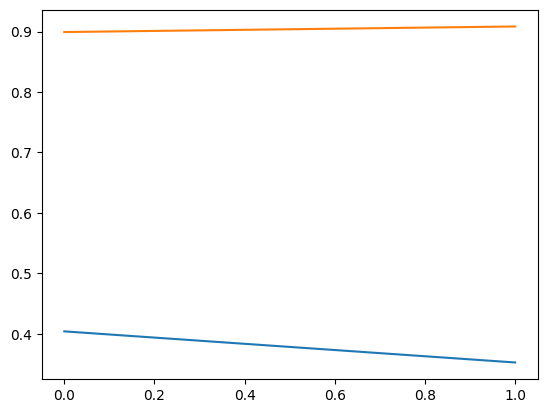

In [8]:
treina_dl(2, 16, 'relu', 0.2, 2)

2023/09/29 09:00:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

1875/1875 [==============================] - 9s 3ms/step - loss: 1.0568 - accuracy: 0.6616 - val_loss: 0.3757 - val_accuracy: 0.9033
Epoch 2/2
1/1 [==============================] - 0s 72ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpp2qg3hvk\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpp2qg3hvk\model\data\model\assets


Modelo: 8b4a5a70e9f2427790468960a39e9902


2023/09/29 09:01:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

1875/1875 [==============================] - 6s 3ms/step - loss: 1.0242 - accuracy: 0.6569 - val_loss: 0.3838 - val_accuracy: 0.8970
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6709 - accuracy: 0.7954 - val_loss: 0.3205 - val_accuracy: 0.9148
Epoch 3/3
1/1 [==============================] - 0s 83ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp0273m1o_\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp0273m1o_\model\data\model\assets


Modelo: 33202e61d7d14fdf879d1bac7ff57057


2023/09/29 09:01:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

1875/1875 [==============================] - 6s 3ms/step - loss: 1.3546 - accuracy: 0.5217 - val_loss: 0.6553 - val_accuracy: 0.8021
Epoch 2/2
1/1 [==============================] - 0s 61ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp9kn3d5wt\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp9kn3d5wt\model\data\model\assets


Modelo: 4b2eb3e7a595428898e1c9d6c6c99912


2023/09/29 09:01:54 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                12560     
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 10)               

1875/1875 [==============================] - 8s 3ms/step - loss: 1.2843 - accuracy: 0.5567 - val_loss: 0.5195 - val_accuracy: 0.8764
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9141 - accuracy: 0.7082 - val_loss: 0.4185 - val_accuracy: 0.9012
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8371 - accuracy: 0.7441 - val_loss: 0.3836 - val_accuracy: 0.9094


1/1 [==============================] - 0s 66ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp4gyjtr76\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp4gyjtr76\model\data\model\assets


Modelo: 06c27360ab74438d8ad7761c7ed55f4f


2023/09/29 09:02:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                12560     
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 10)               

1875/1875 [==============================] - 6s 3ms/step - loss: 0.8335 - accuracy: 0.7429 - val_loss: 0.3785 - val_accuracy: 0.8922
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5380 - accuracy: 0.8435 - val_loss: 0.3230 - val_accuracy: 0.9080


1/1 [==============================] - 1s 1s/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp77wgy5lb\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp77wgy5lb\model\data\model\assets


Modelo: a53ca7fac0b34ad0ac827b905d6fd96f


2023/09/29 09:02:48 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                12560     
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_27 (Dense)            (None, 10)               

INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp9dk6cvld\model\data\model\assets


Modelo: 63cdd3ac3cf842b5a781999f4f0567ee


2023/09/29 09:03:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                12560     
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 16)                272       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 10)               

1875/1875 [==============================] - 5s 2ms/step - loss: 1.0185 - accuracy: 0.6690 - val_loss: 0.4062 - val_accuracy: 0.8838
Epoch 2/2
1/1 [==============================] - 0s 57ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpbwlo69x5\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpbwlo69x5\model\data\model\assets


Modelo: 567b65b6468c48ed8271b72c6e9f65e9


2023/09/29 09:03:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                12560     
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 10)               

1875/1875 [==============================] - 5s 2ms/step - loss: 0.9949 - accuracy: 0.6768 - val_loss: 0.3940 - val_accuracy: 0.8888
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6842 - accuracy: 0.7935 - val_loss: 0.3415 - val_accuracy: 0.9036
Epoch 3/3
1/1 [==============================] - 0s 64ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpepqdrfc0\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpepqdrfc0\model\data\model\assets


Modelo: 7848d236c90446198dc3267394b354c6


2023/09/29 09:03:58 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                25120     
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dropout_28 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 10)               

1875/1875 [==============================] - 5s 2ms/step - loss: 0.6617 - accuracy: 0.7940 - val_loss: 0.2457 - val_accuracy: 0.9285
Epoch 2/2
1/1 [==============================] - 0s 65ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmphkrllth8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmphkrllth8\model\data\model\assets


Modelo: e52ceb16cf2746ce8a48c809d2f6ad09


2023/09/29 09:04:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 10)              

INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpc_qb6pqv\model\data\model\assets


Modelo: f8391f601b86403fa46797fde07b7f96


2023/09/29 09:04:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                25120     
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dropout_34 (Dropout)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                1056      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 10)              

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8435 - accuracy: 0.7316 - val_loss: 0.2745 - val_accuracy: 0.9203
Epoch 2/2
1/1 [==============================] - 0s 58ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp6tchpq34\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp6tchpq34\model\data\model\assets


Modelo: 6dcf08de613d4b1fb4f7de055c2e91f0


2023/09/29 09:05:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                25120     
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                1056      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_51 (Dense)            (None, 10)              

1875/1875 [==============================] - 6s 3ms/step - loss: 0.8594 - accuracy: 0.7158 - val_loss: 0.2837 - val_accuracy: 0.9203
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5126 - accuracy: 0.8508 - val_loss: 0.2558 - val_accuracy: 0.9320
Epoch 3/3
1/1 [==============================] - 0s 58ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpiehm92nd\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpiehm92nd\model\data\model\assets


Modelo: 369dcbbf1448460eab7c24a4040c61c7


2023/09/29 09:05:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                25120     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dropout_41 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 10)              

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5322 - accuracy: 0.8469 - val_loss: 0.2714 - val_accuracy: 0.9209
Epoch 2/2
1/1 [==============================] - 0s 54ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpwokv_nre\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpwokv_nre\model\data\model\assets


Modelo: c281cb8c4ff34bb69d00fbe3c8450503


2023/09/29 09:05:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                25120     
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dropout_44 (Dropout)        (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 10)              

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5286 - accuracy: 0.8466 - val_loss: 0.2642 - val_accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.9031 - val_loss: 0.2198 - val_accuracy: 0.9361
Epoch 3/3
1/1 [==============================] - 0s 53ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpc9tk56bc\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpc9tk56bc\model\data\model\assets


Modelo: 585c73f1b3144cd1acca214431efa6b9


2023/09/29 09:06:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                25120     
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dropout_46 (Dropout)        (None, 32)                0         
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 10)              

1875/1875 [==============================] - 5s 2ms/step - loss: 0.6708 - accuracy: 0.7967 - val_loss: 0.2947 - val_accuracy: 0.9113
Epoch 2/2
1/1 [==============================] - 0s 56ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpw3ye1cfh\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpw3ye1cfh\model\data\model\assets


Modelo: 8a8ad697d1454f68b6b392752e28c395


2023/09/29 09:06:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                25120     
                                                                 
 dropout_48 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 32)                1056      
                                                                 
 dropout_49 (Dropout)        (None, 32)                0         
                                                                 
 dense_66 (Dense)            (None, 32)                1056      
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 10)              

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6576 - accuracy: 0.7993 - val_loss: 0.2861 - val_accuracy: 0.9166
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4260 - accuracy: 0.8790 - val_loss: 0.2562 - val_accuracy: 0.9284
Epoch 3/3
1/1 [==============================] - 0s 64ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpi_hc9ko_\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpi_hc9ko_\model\data\model\assets


Modelo: d69194e85b9f44d983f4a5bb4c4034cb


2023/09/29 09:07:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 16)                12560     
                                                                 
 dropout_51 (Dropout)        (None, 16)                0         
                                                                 
 dense_69 (Dense)            (None, 16)                272       
                                                                 
 dropout_52 (Dropout)        (None, 16)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                272       
                                                                 
 dropout_53 (Dropout)        (None, 16)                0         
                                                                 
 dense_71 (Dense)            (None, 16)              

1875/1875 [==============================] - 5s 2ms/step - loss: 1.2577 - accuracy: 0.5600 - val_loss: 0.5992 - val_accuracy: 0.8729
Epoch 2/2
1/1 [==============================] - 0s 57ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp5981vg3_\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp5981vg3_\model\data\model\assets


Modelo: 73f205bed48b4fecba39108443a0a8df


2023/09/29 09:07:31 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 16)                12560     
                                                                 
 dropout_55 (Dropout)        (None, 16)                0         
                                                                 
 dense_74 (Dense)            (None, 16)                272       
                                                                 
 dropout_56 (Dropout)        (None, 16)                0         
                                                                 
 dense_75 (Dense)            (None, 16)                272       
                                                                 
 dropout_57 (Dropout)        (None, 16)                0         
                                                                 
 dense_76 (Dense)            (None, 16)              

1875/1875 [==============================] - 6s 3ms/step - loss: 1.1822 - accuracy: 0.5723 - val_loss: 0.5575 - val_accuracy: 0.8496
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8286 - accuracy: 0.7268 - val_loss: 0.4279 - val_accuracy: 0.8985
Epoch 3/3
1/1 [==============================] - 0s 67ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp4eo0hs5d\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp4eo0hs5d\model\data\model\assets


Modelo: 591d1e403bca47348b03c9acbc74cb51


2023/09/29 09:07:57 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 16)                12560     
                                                                 
 dropout_59 (Dropout)        (None, 16)                0         
                                                                 
 dense_79 (Dense)            (None, 16)                272       
                                                                 
 dropout_60 (Dropout)        (None, 16)                0         
                                                                 
 dense_80 (Dense)            (None, 16)                272       
                                                                 
 dropout_61 (Dropout)        (None, 16)                0         
                                                                 
 dense_81 (Dense)            (None, 16)              

1875/1875 [==============================] - 5s 2ms/step - loss: 1.5223 - accuracy: 0.4422 - val_loss: 0.8069 - val_accuracy: 0.8111
Epoch 2/2
1/1 [==============================] - 0s 66ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpz8_ugr1l\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpz8_ugr1l\model\data\model\assets


Modelo: 330b7b3fd04945919f0418a216afa17d


2023/09/29 09:08:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 16)                12560     
                                                                 
 dropout_63 (Dropout)        (None, 16)                0         
                                                                 
 dense_84 (Dense)            (None, 16)                272       
                                                                 
 dropout_64 (Dropout)        (None, 16)                0         
                                                                 
 dense_85 (Dense)            (None, 16)                272       
                                                                 
 dropout_65 (Dropout)        (None, 16)                0         
                                                                 
 dense_86 (Dense)            (None, 16)              

1875/1875 [==============================] - 6s 2ms/step - loss: 1.5934 - accuracy: 0.4149 - val_loss: 0.9278 - val_accuracy: 0.7049
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1832 - accuracy: 0.5757 - val_loss: 0.7226 - val_accuracy: 0.8243
Epoch 3/3
1/1 [==============================] - 0s 64ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpzq2ujx94\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpzq2ujx94\model\data\model\assets


Modelo: 82f049d7d2b543a0943ee58a5905980d


2023/09/29 09:08:44 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 16)                12560     
                                                                 
 dropout_67 (Dropout)        (None, 16)                0         
                                                                 
 dense_89 (Dense)            (None, 16)                272       
                                                                 
 dropout_68 (Dropout)        (None, 16)                0         
                                                                 
 dense_90 (Dense)            (None, 16)                272       
                                                                 
 dropout_69 (Dropout)        (None, 16)                0         
                                                                 
 dense_91 (Dense)            (None, 16)              

1875/1875 [==============================] - 6s 3ms/step - loss: 0.9239 - accuracy: 0.7127 - val_loss: 0.3997 - val_accuracy: 0.8838
Epoch 2/2
1/1 [==============================] - 0s 67ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpdoar3cws\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpdoar3cws\model\data\model\assets


Modelo: 94c03996ff9a4b08a159eb072c33882b


2023/09/29 09:09:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 16)                12560     
                                                                 
 dropout_71 (Dropout)        (None, 16)                0         
                                                                 
 dense_94 (Dense)            (None, 16)                272       
                                                                 
 dropout_72 (Dropout)        (None, 16)                0         
                                                                 
 dense_95 (Dense)            (None, 16)                272       
                                                                 
 dropout_73 (Dropout)        (None, 16)                0         
                                                                 
 dense_96 (Dense)            (None, 16)              

1875/1875 [==============================] - 6s 3ms/step - loss: 0.9072 - accuracy: 0.7139 - val_loss: 0.4061 - val_accuracy: 0.8873
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6082 - accuracy: 0.8223 - val_loss: 0.3386 - val_accuracy: 0.9086
Epoch 3/3
1/1 [==============================] - 0s 89ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpeq16k6cu\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpeq16k6cu\model\data\model\assets


Modelo: a8551af38fcc42a9a9e5a667f57d3e97


2023/09/29 09:09:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 16)                12560     
                                                                 
 dropout_75 (Dropout)        (None, 16)                0         
                                                                 
 dense_99 (Dense)            (None, 16)                272       
                                                                 
 dropout_76 (Dropout)        (None, 16)                0         
                                                                 
 dense_100 (Dense)           (None, 16)                272       
                                                                 
 dropout_77 (Dropout)        (None, 16)                0         
                                                                 
 dense_101 (Dense)           (None, 16)              

1875/1875 [==============================] - 5s 2ms/step - loss: 1.1858 - accuracy: 0.5974 - val_loss: 0.5615 - val_accuracy: 0.8400
Epoch 2/2
1/1 [==============================] - 0s 69ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpap8f6szb\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpap8f6szb\model\data\model\assets


Modelo: eaf78103801b4a309ad74d74147ac176


2023/09/29 09:09:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 16)                12560     
                                                                 
 dropout_79 (Dropout)        (None, 16)                0         
                                                                 
 dense_104 (Dense)           (None, 16)                272       
                                                                 
 dropout_80 (Dropout)        (None, 16)                0         
                                                                 
 dense_105 (Dense)           (None, 16)                272       
                                                                 
 dropout_81 (Dropout)        (None, 16)                0         
                                                                 
 dense_106 (Dense)           (None, 16)              

1875/1875 [==============================] - 6s 3ms/step - loss: 1.2228 - accuracy: 0.5823 - val_loss: 0.6166 - val_accuracy: 0.8230
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8831 - accuracy: 0.7223 - val_loss: 0.5106 - val_accuracy: 0.8613
Epoch 3/3
1/1 [==============================] - 0s 63ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpqf2ga2qh\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpqf2ga2qh\model\data\model\assets


Modelo: f1820360f5a946a3b09a1342efc2c72d


2023/09/29 09:10:24 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 32)                25120     
                                                                 
 dropout_83 (Dropout)        (None, 32)                0         
                                                                 
 dense_109 (Dense)           (None, 32)                1056      
                                                                 
 dropout_84 (Dropout)        (None, 32)                0         
                                                                 
 dense_110 (Dense)           (None, 32)                1056      
                                                                 
 dropout_85 (Dropout)        (None, 32)                0         
                                                                 
 dense_111 (Dense)           (None, 32)              

1875/1875 [==============================] - 7s 3ms/step - loss: 0.7772 - accuracy: 0.7467 - val_loss: 0.2795 - val_accuracy: 0.9201
Epoch 2/2
1/1 [==============================] - 0s 66ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp706kjmp8\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp706kjmp8\model\data\model\assets


Modelo: b97ece6fdcaa428fb351e2f2577e8712


2023/09/29 09:10:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 32)                25120     
                                                                 
 dropout_87 (Dropout)        (None, 32)                0         
                                                                 
 dense_114 (Dense)           (None, 32)                1056      
                                                                 
 dropout_88 (Dropout)        (None, 32)                0         
                                                                 
 dense_115 (Dense)           (None, 32)                1056      
                                                                 
 dropout_89 (Dropout)        (None, 32)                0         
                                                                 
 dense_116 (Dense)           (None, 32)              

1875/1875 [==============================] - 6s 2ms/step - loss: 0.7666 - accuracy: 0.7536 - val_loss: 0.2608 - val_accuracy: 0.9259
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.8855 - val_loss: 0.2223 - val_accuracy: 0.9385
Epoch 3/3
1/1 [==============================] - 0s 67ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp79p1ewx4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp79p1ewx4\model\data\model\assets


Modelo: 8fcb40d25ee24d1081bf11558e66e963


2023/09/29 09:11:13 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 32)                25120     
                                                                 
 dropout_91 (Dropout)        (None, 32)                0         
                                                                 
 dense_119 (Dense)           (None, 32)                1056      
                                                                 
 dropout_92 (Dropout)        (None, 32)                0         
                                                                 
 dense_120 (Dense)           (None, 32)                1056      
                                                                 
 dropout_93 (Dropout)        (None, 32)                0         
                                                                 
 dense_121 (Dense)           (None, 32)              

1875/1875 [==============================] - 6s 3ms/step - loss: 1.0188 - accuracy: 0.6523 - val_loss: 0.3758 - val_accuracy: 0.9030
Epoch 2/2
1/1 [==============================] - 0s 61ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmplph0qyn4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmplph0qyn4\model\data\model\assets


Modelo: 4753eccaba454238ba3469dfea0a9c25


2023/09/29 09:11:37 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 32)                25120     
                                                                 
 dropout_95 (Dropout)        (None, 32)                0         
                                                                 
 dense_124 (Dense)           (None, 32)                1056      
                                                                 
 dropout_96 (Dropout)        (None, 32)                0         
                                                                 
 dense_125 (Dense)           (None, 32)                1056      
                                                                 
 dropout_97 (Dropout)        (None, 32)                0         
                                                                 
 dense_126 (Dense)           (None, 32)              

1875/1875 [==============================] - 5s 2ms/step - loss: 0.9660 - accuracy: 0.6830 - val_loss: 0.3523 - val_accuracy: 0.9139
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5730 - accuracy: 0.8443 - val_loss: 0.3052 - val_accuracy: 0.9240
Epoch 3/3
1/1 [==============================] - 0s 69ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmplc5lrjwp\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmplc5lrjwp\model\data\model\assets


Modelo: bf670c4d001c461ebd8864bc7edfcf96


2023/09/29 09:12:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 32)                25120     
                                                                 
 dropout_99 (Dropout)        (None, 32)                0         
                                                                 
 dense_129 (Dense)           (None, 32)                1056      
                                                                 
 dropout_100 (Dropout)       (None, 32)                0         
                                                                 
 dense_130 (Dense)           (None, 32)                1056      
                                                                 
 dropout_101 (Dropout)       (None, 32)                0         
                                                                 
 dense_131 (Dense)           (None, 32)              

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5944 - accuracy: 0.8243 - val_loss: 0.2929 - val_accuracy: 0.9160
Epoch 2/2
1/1 [==============================] - 0s 66ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpab7j8yyy\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpab7j8yyy\model\data\model\assets


Modelo: 172ade2cbdce46b1a0b965e204552d53


2023/09/29 09:12:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 32)                25120     
                                                                 
 dropout_103 (Dropout)       (None, 32)                0         
                                                                 
 dense_134 (Dense)           (None, 32)                1056      
                                                                 
 dropout_104 (Dropout)       (None, 32)                0         
                                                                 
 dense_135 (Dense)           (None, 32)                1056      
                                                                 
 dropout_105 (Dropout)       (None, 32)                0         
                                                                 
 dense_136 (Dense)           (None, 32)              

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5899 - accuracy: 0.8252 - val_loss: 0.2792 - val_accuracy: 0.9201
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8968 - val_loss: 0.2281 - val_accuracy: 0.9383
Epoch 3/3
1/1 [==============================] - 0s 63ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpelii3uak\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpelii3uak\model\data\model\assets


Modelo: 8366f638b27d4667af76b855f8250696


2023/09/29 09:13:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 32)                25120     
                                                                 
 dropout_107 (Dropout)       (None, 32)                0         
                                                                 
 dense_139 (Dense)           (None, 32)                1056      
                                                                 
 dropout_108 (Dropout)       (None, 32)                0         
                                                                 
 dense_140 (Dense)           (None, 32)                1056      
                                                                 
 dropout_109 (Dropout)       (None, 32)                0         
                                                                 
 dense_141 (Dense)           (None, 32)              

1875/1875 [==============================] - 11s 5ms/step - loss: 0.7871 - accuracy: 0.7529 - val_loss: 0.3216 - val_accuracy: 0.9078
Epoch 2/2
1/1 [==============================] - 0s 120ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp797sdmql\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmp797sdmql\model\data\model\assets


Modelo: 2e45d6045cbb4a0c83f42eb1ee1eb514


2023/09/29 09:13:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 32)                25120     
                                                                 
 dropout_111 (Dropout)       (None, 32)                0         
                                                                 
 dense_144 (Dense)           (None, 32)                1056      
                                                                 
 dropout_112 (Dropout)       (None, 32)                0         
                                                                 
 dense_145 (Dense)           (None, 32)                1056      
                                                                 
 dropout_113 (Dropout)       (None, 32)                0         
                                                                 
 dense_146 (Dense)           (None, 32)              

1875/1875 [==============================] - 8s 3ms/step - loss: 0.7579 - accuracy: 0.7625 - val_loss: 0.3216 - val_accuracy: 0.9052
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4971 - accuracy: 0.8602 - val_loss: 0.2929 - val_accuracy: 0.9187
Epoch 3/3
1/1 [==============================] - 0s 116ms/step
INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpxpxbamd4\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\BLUESH~1\AppData\Local\Temp\tmpxpxbamd4\model\data\model\assets


Modelo: 2fc713e6c9dd4e03a7ab1c09335c1be2


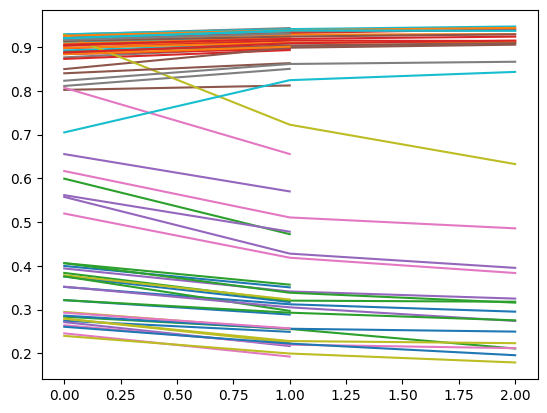

In [9]:
n_camadas_ocultas = [2, 3]
n_neuronios = [16, 32]
activation = ['relu', 'tanh']
drop_out = [0.2, 0.3]
epochs = [2, 3]

for i in n_camadas_ocultas:
  for j in n_neuronios:
    for k in activation:
      for l in drop_out:
        for m in epochs:
          treina_dl(i, j, k, l, m)